In [1]:
import pandas as pd
import numpy as np

In [38]:
!ls /home/anton/Datasets/MovieLens/ml-100k/

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [39]:
df = pd.read_csv('../data/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
# df = pd.read_csv('/home/anton/Datasets/MovieLens/ml-1m/ratings.dat', sep='::', names=['user_id', 'item_id', 'rating', 'timestamp'])
# movie_titles = pd.read_csv("../data/Movie_Id_Titles.txt")

In [40]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [41]:
df.pivot_table(values='rating', index='user_id', columns='item_id')[:10]

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,5.0,NaN,NaN,5.0,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df['date'] = pd.to_datetime(df['timestamp'], unit="s")

In [43]:
#df.groupby(by=['user_id'])
a = df.sort_values(by=['user_id', 'date'])

In [44]:
u1 = a[a['user_id'] == 1]

In [45]:
u1['session'] = (u1['timestamp'] - u1['timestamp'].shift(1) > 60*20).fillna(0).cumsum(skipna=False)

/home/anton/anaconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
u1['rating'] = 0.5*(u1['rating'] - 3)

/home/anton/anaconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
!ls ../data

ml-100k  ml-100k.zip  Movie_Id_Titles.txt  u.data  u.item


In [48]:
#movie_info = pd.read_csv('../data/u.item', sep='|', encoding="ISO-8859-1", names=['idx', 'title', 'date', 'x', 'link', *range(19)])

In [49]:
df['rating_bin'] = df['rating'] > 3

In [50]:
from collections import defaultdict
#  current_consecutive = { user : { 'pos' : , 'neg' : } }
#  ratings_pos = { 'n_pos' : [ratings] }
#  ratings_neg = { 'n_neg' : [ratings] }
current_consecutive = {}
rating_pos = defaultdict(list)
rating_neg = defaultdict(list)

for i, row in df.sample(frac=1).iterrows():#sort_values('timestamp').iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    rating  = row['rating']
    ispositive = row['rating'] > 3
    
    if user_id not in current_consecutive:
        current_consecutive[user_id] = {
            'pos' : 0,
            'neg' : 0,
        }
    
    user = current_consecutive[user_id]
    
    if user['pos'] > 0:
        rating_pos[user['pos']].append(rating)
    if user['neg'] > 0:
        rating_neg[user['neg']].append(rating)
    
    if ispositive:
        if user['pos'] > 0:
            user['pos'] += 1
        else:
            user['pos'] = 1
            user['neg'] = 0        
    else:
        if user['neg'] > 0:
            user['neg'] += 1
        else:
            user['neg'] = 1
            user['pos'] = 0

In [51]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [52]:
sns.set()
sns.set(font_scale=2) 

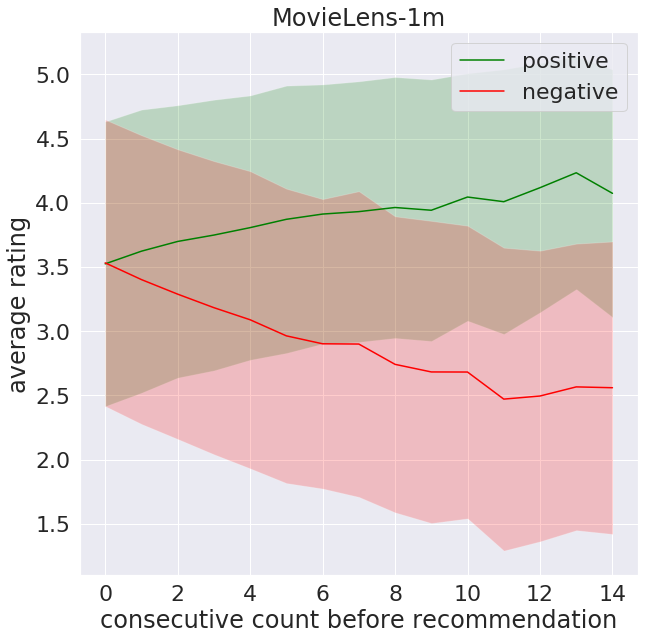

In [53]:
n = 15
plt.figure(figsize=(10, 10))
mean = np.array([ np.mean(v) for k, v in rating_pos.items()][:n])
std = np.array([ np.std(v) for k, v in rating_pos.items()][:n])
upper = mean + std 
lower = mean - std
plt.plot(mean, label='positive', color='green')
plt.fill_between(range(n), upper, lower, facecolor='green', alpha=0.2)

mean = np.array([ np.mean(v) for k, v in rating_neg.items()][:n])
std = np.array([ np.std(v) for k, v in rating_neg.items()][:n])
upper = mean + std 
lower = mean - std
plt.plot(mean, label='negative', color='red')
plt.fill_between(range(n), upper, lower, facecolor='red', alpha=0.2)
plt.ylabel('average rating')
plt.xlabel('consecutive count before recommendation')
plt.title('MovieLens-1m')
plt.legend();

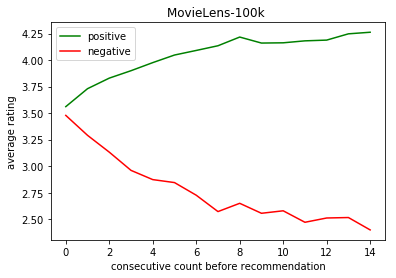

In [14]:
n = 15
plt.plot([ np.mean(v) for k, v in rating_pos.items()][:n], label='positive', color='green')
plt.plot([ np.mean(v) for k, v in rating_neg.items()][:n], label='negative', color='red')
plt.ylabel('average rating')
plt.xlabel('consecutive count before recommendation')
plt.title('MovieLens-100k ')
plt.legend();

In [21]:
def count_consecutive_rating(df):
    current_consecutive = {}
    rating_pos = defaultdict(list)
    rating_neg = defaultdict(list)

    for i, row in df.sample(frac=1).iterrows():#sort_values('timestamp').iterrows():
        user_id = row['user_id']
        item_id = row['item_id']
        rating  = row['rating']
        ispositive = row['rating'] > 3

        if user_id not in current_consecutive:
            current_consecutive[user_id] = {
                'pos' : 0,
                'neg' : 0,
            }

        user = current_consecutive[user_id]

        if user['pos'] > 0:
            rating_pos[user['pos']].append(rating)
        if user['neg'] > 0:
            rating_neg[user['neg']].append(rating)

        if ispositive:
            if user['pos'] > 0:
                user['pos'] += 1
            else:
                user['pos'] = 1
                user['neg'] = 0        
        else:
            if user['neg'] > 0:
                user['neg'] += 1
            else:
                user['neg'] = 1
                user['pos'] = 0
    return rating_pos, rating_neg

In [22]:
import tqdm

In [54]:
data = []
for i in tqdm.tqdm_notebook(range(5)):
    rating_pos, rating_neg = count_consecutive_rating(df.sample(frac=1.))
    data.append((rating_pos, rating_neg))

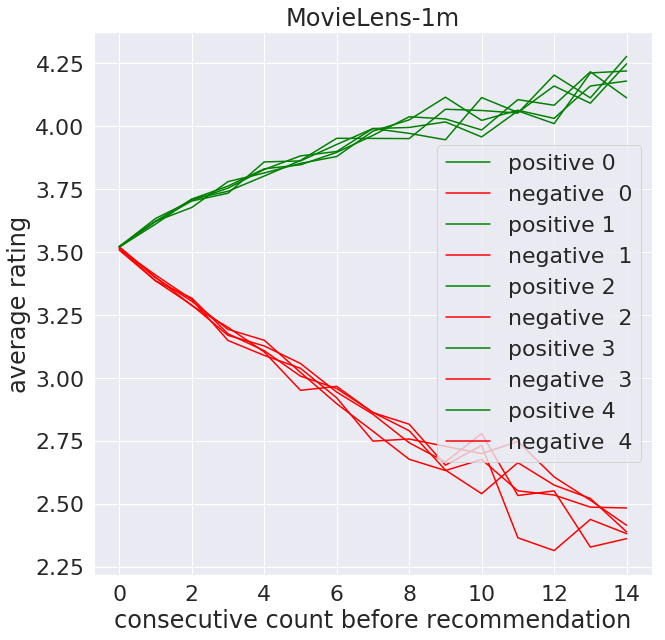

In [55]:
n = 15
plt.figure(figsize=(10, 10))

for i, (rating_pos, rating_neg) in enumerate(data):

    mean = np.array([ np.mean(v) for k, v in rating_pos.items()][:n])
    std = np.array([ np.std(v) for k, v in rating_pos.items()][:n])
    upper = mean + std 
    lower = mean - std
    plt.plot(mean, label='positive {}'.format(i), color='green', )
#     plt.fill_between(range(n), upper, lower, facecolor='green', alpha=0.2)

    mean = np.array([ np.mean(v) for k, v in rating_neg.items()][:n])
    std = np.array([ np.std(v) for k, v in rating_neg.items()][:n])
    upper = mean + std 
    lower = mean - std
    plt.plot(mean, label='negative  {}'.format(i), color='red')
#     plt.fill_between(range(n), upper, lower, facecolor='red', alpha=0.2)

plt.ylabel('average rating')
plt.xlabel('consecutive count before recommendation')
plt.title('MovieLens-1m')
plt.legend();